In [1]:
import multiprocessing as mp
import os
import random as rn
import warnings
from glob import glob
from pathlib import Path

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timesynth as ts
import yfinance as yf
from IPython.display import display
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from run import run_cmd

seed = 42
sns.set()

def reset_seed():
    os.environ["PYTHONHASHSEED"] = str(seed)
    rn.seed(seed)
    np.random.seed(seed)

In [69]:
data_name = "stock"

In [90]:
if data_name == "nyc_energy":
    data_path = "data/nyc_energy.csv"
    data = pd.read_csv(data_path)[:-81]
    dt, target = "timeStamp", "demand"
elif data_name == "nyc_taxi":
    data_path = "data/nyc_taxi.csv"
    data = pd.read_csv(data_path)
    dt, target = "timestamp", "value"
elif data_name == "jena":
    data_path = "data/jena_climate_2009_2016.csv"
    data = pd.read_csv(data_path)
    dt, target = "Date Time", "VPmax (mbar)"
elif data_name == "stock":
    data_path = "data/Processed_NASDAQ.csv"
    data = pd.read_csv(data_path).drop([
        'mom', 'mom1', 'mom2', 'mom3', 'ROC_5', 'ROC_10', 'ROC_15', 'ROC_20', 'EMA_10',
        'EMA_20', 'EMA_50', 'EMA_200'], axis=1)
    dt, target = "Date", "Close"

print(data.columns)
print(data.shape, data.isna().sum().values)

data[dt] = pd.to_datetime(data[dt])
data = data.set_index(dt)
# data = data[[target]]
data = data.resample("d").mean().interpolate()[5:]
print(data.shape, data.isna().sum().values)
# data = data.reset_index()

# display(data)
# data.plot(x=dt, y=target, figsize=(13, 5))
# plt.tight_layout()
# plt.show()

Index(['Date', 'Close', 'Volume', 'DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10',
       'Oil', 'Gold', 'DAAA', 'DBAA', 'GBP', 'JPY', 'CAD', 'CNY', 'AAPL',
       'AMZN', 'GE', 'JNJ', 'JPM', 'MSFT', 'WFC', 'XOM', 'FCHI', 'FTSE',
       'GDAXI', 'GSPC', 'HSI', 'DJI', 'SSEC', 'RUT', 'NYSE', 'TE1', 'TE2',
       'TE3', 'TE5', 'TE6', 'DE1', 'DE2', 'DE4', 'DE5', 'DE6', 'CTB3M',
       'CTB6M', 'CTB1Y', 'Name', 'AUD', 'Brent', 'CAC-F', 'copper-F',
       'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F', 'gold-F', 'HSI-F',
       'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD', 'silver-F',
       'RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F', 'Dollar index',
       'wheat-F', 'XAG', 'XAU'],
      dtype='object')
(1984, 72) [  0   0   1   0   0   0   0   0   1   1   0   0 478 479 483 479   1   1
   1   1   1   1   1   1  40  71  67   1 170   1 238   1   1   0   0   0
   0   0   0   0   0   0   0   1   1   1   0   0   0   4   0   0   4   0
   0   6   0  75  79   0   0   0   0   0   0   0   0   0   0  

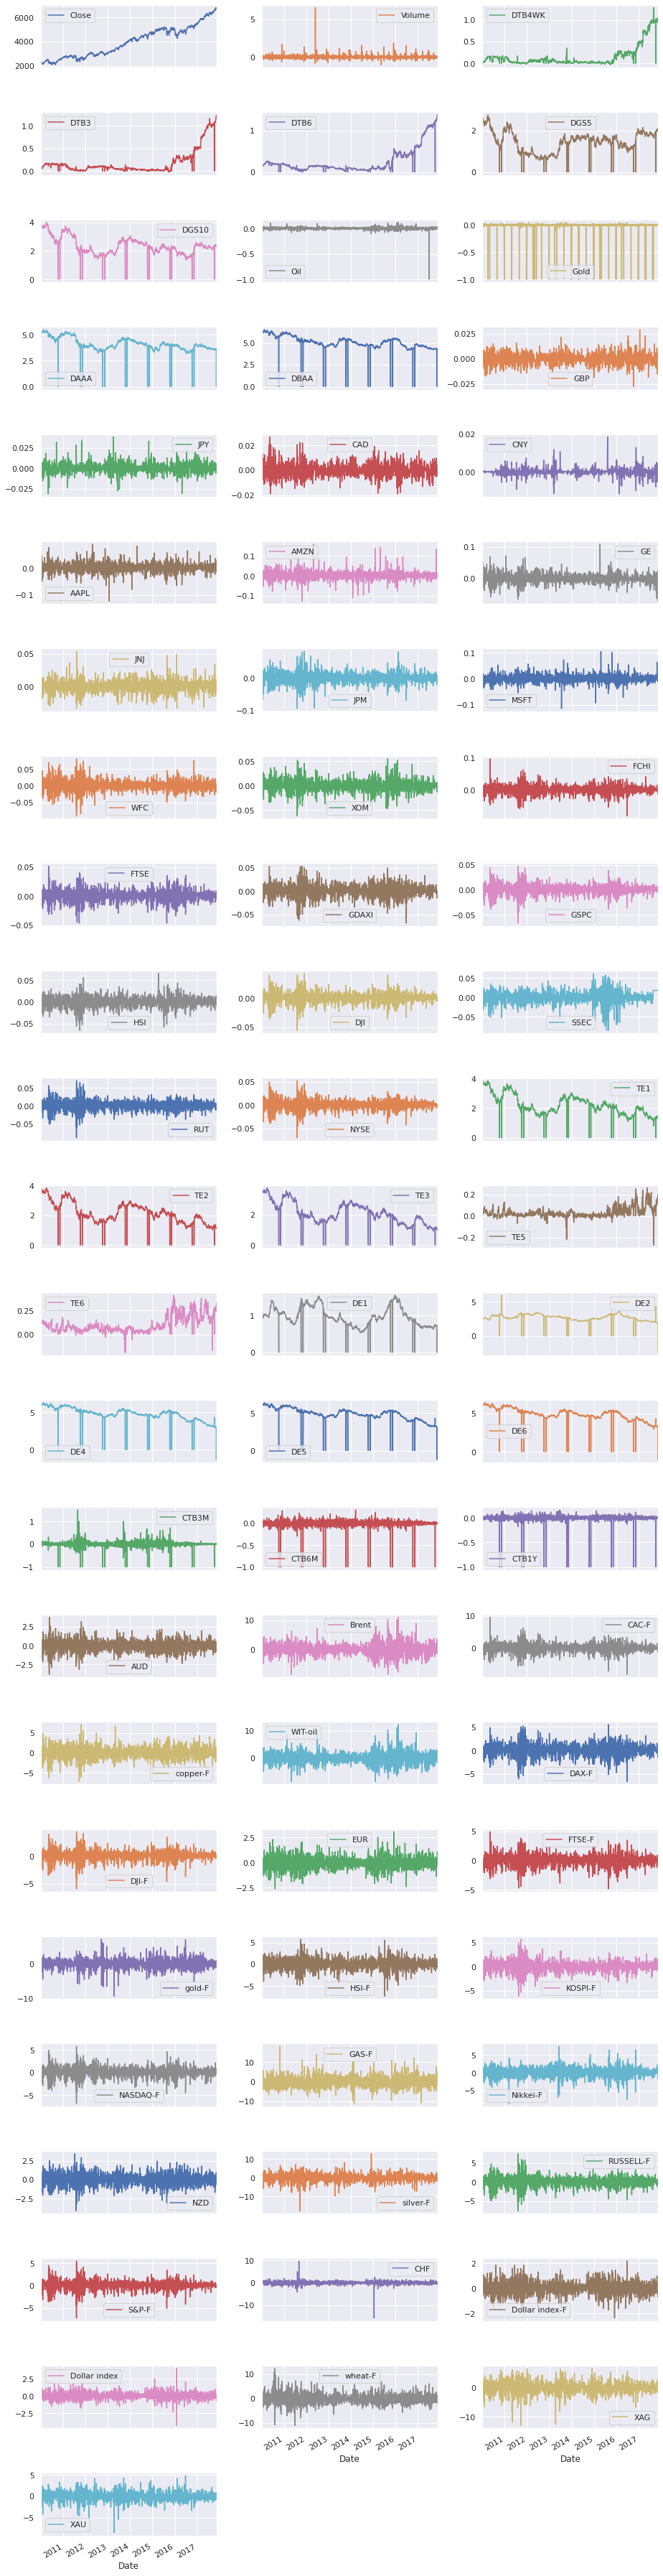

In [91]:
data.plot(subplots=True, grid=True, layout=(24, 3), figsize=(13, 50), sharex=True)
plt.tight_layout()
plt.show()